[[3.3  3.31 3.32 ... 8.87 8.88 8.89]
 [3.3  3.31 3.32 ... 8.87 8.88 8.89]
 [3.3  3.31 3.32 ... 8.87 8.88 8.89]
 ...
 [3.3  3.31 3.32 ... 8.87 8.88 8.89]
 [3.3  3.31 3.32 ... 8.87 8.88 8.89]
 [3.3  3.31 3.32 ... 8.87 8.88 8.89]] [[1.   1.   1.   ... 1.   1.   1.  ]
 [1.01 1.01 1.01 ... 1.01 1.01 1.01]
 [1.02 1.02 1.02 ... 1.02 1.02 1.02]
 ...
 [5.37 5.37 5.37 ... 5.37 5.37 5.37]
 [5.38 5.38 5.38 ... 5.38 5.38 5.38]
 [5.39 5.39 5.39 ... 5.39 5.39 5.39]] [[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]
[[3.3  3.31 3.32 ... 8.87 8.88 8.89]
 [3.3  3.31 3.32 ... 8.87 8.88 8.89]
 [3.3  3.31 3.32 ... 8.87 8.88 8.89]
 ...
 [3.3  3.31 3.32 ... 8.87 8.88 8.89]
 [3.3  3.31 3.32 ... 8.87 8.88 8.89]
 [3.3  3.31 3.32 ... 8.87 8.88 8.89]] [[1.   1.   1.   ... 1.   1.   1.  ]
 [1.01 1.01 1.01 ... 1.01 1.01 1.01]
 [1.02 1.02 1.02 ... 1.02 1.02 1.02]
 ...
 [5.37 5.37 5.37 ... 5.37 5.37 5.37]
 [5.38 5.38 5.38 ... 5.38 5.38 5.38]
 [5.39

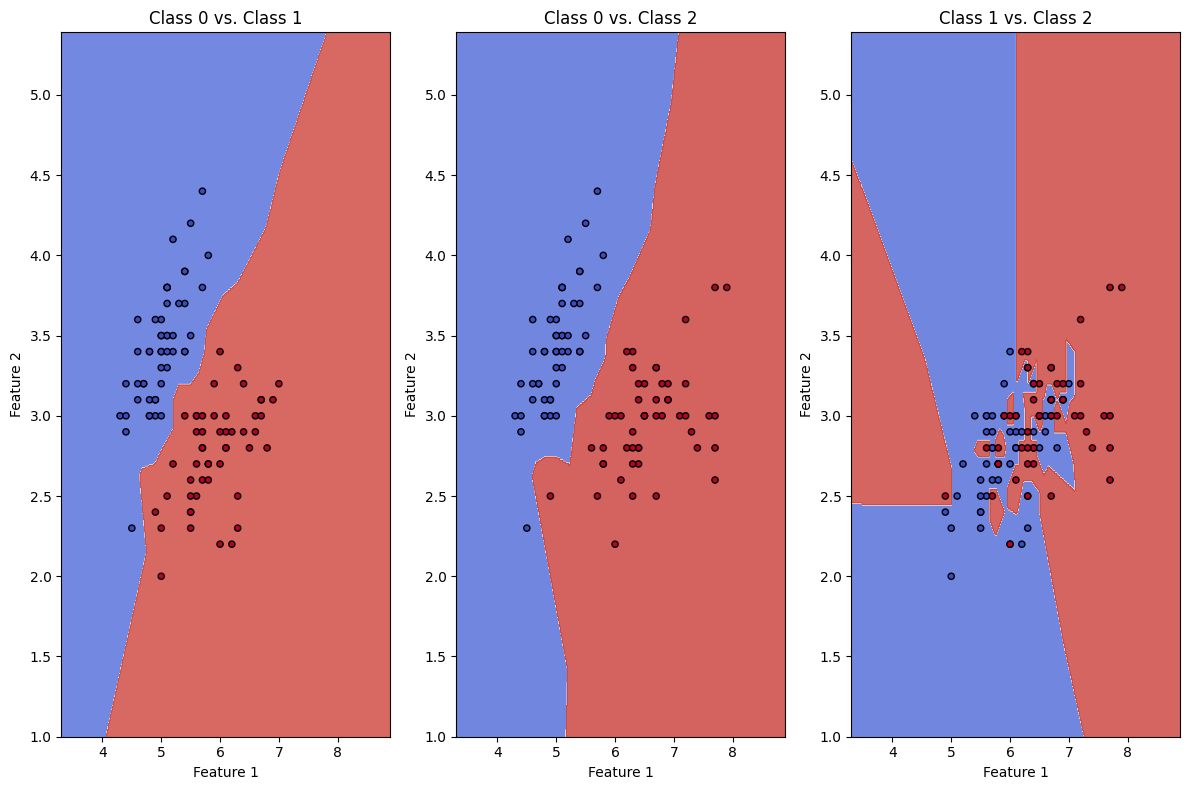

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from itertools import combinations

# Load the Iris dataset (or your own dataset)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization
y = iris.target

# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Create subplots for decision region plots
class_pairs = list(combinations(np.unique(y), 2))
num_plots = len(class_pairs)

plt.figure(figsize=(12, 8))
for i, (class1, class2) in enumerate(class_pairs, 1):
    plt.subplot(1, num_plots, i)

    # Filter the data for the current pair of classes
    X_pair = X[(y == class1) | (y == class2)]
    y_pair = y[(y == class1) | (y == class2)]

    # Train a k-NN classifier for the current pair of classes
    clf = KNeighborsClassifier(n_neighbors=1)  # 1-NN for simplicity; you can adjust k
    clf.fit(X_pair, y_pair)

    # Make predictions for the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision regions
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    print(xx, yy, Z)
    # Plot the training data points
    plt.scatter(X_pair[:, 0], X_pair[:, 1], c=y_pair, cmap=plt.cm.coolwarm, edgecolor='k', s=20)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Class {class1} vs. Class {class2}')

plt.tight_layout()
plt.show()


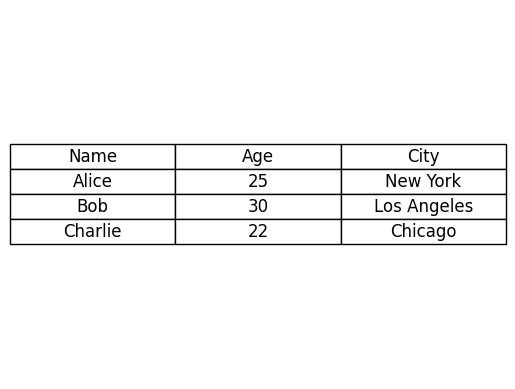

In [3]:
import matplotlib.pyplot as plt

# Sample data for the table
data = [
    ['Name', 'Age', 'City'],
    ['Alice', 25, 'New York'],
    ['Bob', 30, 'Los Angeles'],
    ['Charlie', 22, 'Chicago'],
]

# Create a figure and axis
fig, ax = plt.subplots()

# Create the table and add it to the axis
table = ax.table(cellText=data, loc='center', cellLoc='center')

# Style the table (optional)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)  # Adjust the table size

# Hide axis labels and ticks (optional)
ax.axis('off')

# Display the plot
plt.show()


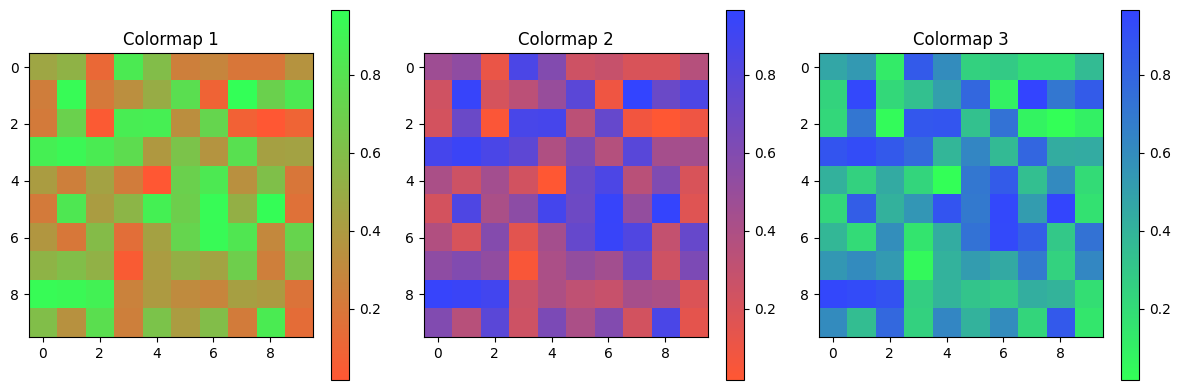

In [4]:
import matplotlib.colors as mcolors

# Define the color pairs
color_pairs = [('#FF5733', '#33FF57'), ('#FF5733', '#3344FF'), ('#33FF57', '#3344FF')]

# Create colormaps
colormaps = []
for color1, color2 in color_pairs:
    cmap_name = f'custom_{color1}_{color2}'
    cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, [color1, color2], N=256)
    colormaps.append(cmap)

# Example: Using the colormaps
import matplotlib.pyplot as plt
import numpy as np

# Create a sample data array
data = np.random.rand(10, 10)

# Plot using the custom colormaps
plt.figure(figsize=(12, 4))
for i, cmap in enumerate(colormaps, 1):
    plt.subplot(1, len(colormaps), i)
    plt.imshow(data, cmap=cmap)
    plt.colorbar()
    plt.title(f'Colormap {i}')

plt.tight_layout()
plt.show()
